# Skills keywords

Objective: identifying skills keywords from job descritions with basic NLP techniques.

In [246]:
import collections
import json
import matplotlib.pyplot as plt
import nltk
import pandas as pd
from wordcloud import WordCloud

from selenium import webdriver
from bs4 import BeautifulSoup
import time
import string
import numpy as np
import seaborn as sns
from tqdm import tqdm

## Data extraction

In [247]:
def url_to_soup(url):
    """"
    Step 1: extract url's html into soup object.
    """
    driver = webdriver.Chrome()
    driver.get(url)

    time.sleep(3)
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    driver.close()
    return soup

# Check.
#url = "https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location=United%20States"
#soup = url_to_soup(url)

In [248]:
def soup_to_jobs(soup):
    """"
    Step 2: get all jobs specific url from the LinkedIn general search.
    """
    descriptions = soup.find_all("a", class_="base-card__full-link absolute top-0 right-0 bottom-0 left-0 p-0 z-[2]")

    list_job_href = [i.get('href') for i in descriptions]
    print(f"Jobs found: {len(list_job_href)}")
    
    return list_job_href

# Check.
#list_job_href = soup_to_jobs(soup)

In [249]:
def jobs_to_description(list_href):
    """
    Step 3: extract raw job description from job posting.
    """
    list_title = []
    list_description = []
    
    for href in list_href:
        soup = url_to_soup(href)
        list_title.append(soup.find('title').string)
        list_description.append(soup.find('div', class_='show-more-less-html__markup show-more-less-html__markup--clamp-after-5').get_text())

    df = pd.DataFrame({'title': list_title, 'href': list_href, 'description':list_description})
    return df

# Check
#df = jobs_to_description(list_job_href[:3])

In [250]:
# Creating single list of LinkedIn job's urls passing specific filters.
df_states = pd.read_html('https://www.jagranjosh.com/general-knowledge/list-of-states-in-usa-1663078166-1', header=0)[0]
df_states['State'] = df_states['State'].str.replace(' ', '%20')


list_url = []
for i in df_states['State']:
    # Name: Senior Data Scientist.
    list_url.append(f'https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location={i}&position=1&pageNum=0')

    # Experience level: mid-senior level.
    list_url.append(f'https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location={i}&f_TPR=&f_E=4&position=1&pageNum=0')

    # Name: Data Scientist III
    list_url.append(f'https://www.linkedin.com/jobs/search?keywords=Data%20Scientist%20III&location={i}&position=1&pageNum=0')

list_url[:5]

['https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location=Alabama&position=1&pageNum=0',
 'https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location=Alabama&f_TPR=&f_E=4&position=1&pageNum=0',
 'https://www.linkedin.com/jobs/search?keywords=Data%20Scientist%20III&location=Alabama&position=1&pageNum=0',
 'https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location=Alaska&position=1&pageNum=0',
 'https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location=Alaska&f_TPR=&f_E=4&position=1&pageNum=0']

In [251]:
def pipeline_extract(list_url):
    """
    Step 1 + 2 + 3: encapsulate all exctraction steps.
    """

    df_output = pd.DataFrame()
    for i in tqdm(list_url):
        try:
            soup = url_to_soup(i)
            list_job_href = soup_to_jobs(soup)
            df = jobs_to_description(list_job_href)
            df_output = pd.concat([df_output, df], axis=0).reset_index(drop=True)
        except:
            print(f"The url {i} did not return jobs.")

    df_output.drop_duplicates(inplace=True)
    return df_output

In [252]:
#df_raw = pipeline_extract(list_url)
df_raw = pd.read_csv('teste.csv')

In [253]:
df_raw.loc[3, 'href']

'https://www.linkedin.com/jobs/view/data-scientist-at-ignitec-inc-3549564083?refId=Zax6RSoNQCl7RXrdHQkrtQ%3D%3D&trackingId=kuRJ3ThR1RSYhPjGOOE7vA%3D%3D&position=4&pageNum=0&trk=public_jobs_jserp-result_search-card'

In [254]:
# Creating single list of LinkedIn job's urls passing specific filters.
df_states = pd.read_html('https://www.jagranjosh.com/general-knowledge/list-of-states-in-usa-1663078166-1', header=0)[0]
df_states['State'] = df_states['State'].str.replace(' ', '%20')


list_url = []
for i in df_states['State']:
    # Name: Senior Data Scientist.
    list_url.append(f'https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location={i}&position=1&pageNum=0')

    # Experience level: mid-senior level.
    list_url.append(f'https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location={i}&f_TPR=&f_E=4&position=1&pageNum=0')

    # Name: Data Scientist III
    list_url.append(f'https://www.linkedin.com/jobs/search?keywords=Data%20Scientist%20III&location={i}&position=1&pageNum=0')

list_url[:5]

['https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location=Alabama&position=1&pageNum=0',
 'https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location=Alabama&f_TPR=&f_E=4&position=1&pageNum=0',
 'https://www.linkedin.com/jobs/search?keywords=Data%20Scientist%20III&location=Alabama&position=1&pageNum=0',
 'https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location=Alaska&position=1&pageNum=0',
 'https://www.linkedin.com/jobs/search?keywords=Senior%20Data%20Scientist&location=Alaska&f_TPR=&f_E=4&position=1&pageNum=0']

In [255]:
#df_raw.sample(5)
df_raw.to_csv('teste.csv', index=False)
#df_raw = pd.read_csv('dataset.csv')
df_raw

,title,href,description
0,Recruiting from Scratch está contratando Senio...,https://www.linkedin.com/jobs/view/senior-data...,\nWho is Recruiting from Scratch: Recruiting f...
1,Recruiting from Scratch está contratando Senio...,https://www.linkedin.com/jobs/view/senior-data...,\nWho is Recruiting from Scratch: Recruiting f...
2,Intuitive Research and Technology Corporation ...,https://www.linkedin.com/jobs/view/entry-level...,\nINTUITIVE® is a nationally recognized Best P...
3,Ignitec Inc está contratando Data Scientist em...,https://www.linkedin.com/jobs/view/data-scient...,"\nRole: Data Scientist Pay: $110,000-$130,000L..."
4,ISSAC LLC está contratando Data Scientist em: ...,https://www.linkedin.com/jobs/view/data-scient...,\n Category: Engineering Location: Hunt...
...,...,...,...
2331,3.000 vagas de Data Scientist Iii em: Estados ...,https://www.linkedin.com/jobs/data-scientist-i...,"\nTitle: Bioanalytical Scientist, DiscoveryLoc..."
2332,3.000 vagas de Data Scientist Iii em: Estados ...,https://www.linkedin.com/jobs/data-scientist-i...,"\nJOB DESCRIPTIONThe role of the “Chemistry, M..."
2333,3.000 vagas de Data Scientist Iii em: Estados ...,https://www.linkedin.com/jobs/data-scientist-i...,\n 12 Month Contract (Likelihood to ext...
2334,3.000 vagas de Data Scientist Iii em: Estados ...,https://www.linkedin.com/jobs/data-scientist-i...,\nAbout Company: HiFiBiO Therapeutics is an em...


In [256]:
df_raw.loc[0, 'href']
df_raw.loc[1, 'href']

'https://www.linkedin.com/jobs/view/senior-data-scientist-at-recruiting-from-scratch-3437494438?refId=Zax6RSoNQCl7RXrdHQkrtQ%3D%3D&trackingId=ThPAtTHan7ormTmSapg1lw%3D%3D&position=2&pageNum=0&trk=public_jobs_jserp-result_search-card'

## Data preprocessing

In [296]:
df_eda = df_raw.copy(deep=True)

In [261]:
def nlp_preprocessing(descr, stopwords, lem):


    # Specific case: "/"
    descr = descr.replace('/', ' ')

    # Tokenize description column.
    tokens = nltk.tokenize.word_tokenize(descr)

    # Lowercase all tokens.
    tokens = [i.lower() for i in tokens]

    # Remove punctuation.
    tokens = [i for i in tokens if i not in string.punctuation + '’' + '--']

    # Using nltk default stopwords.
    #nltk.download('stopwords')
    #stopwords = nltk.corpus.stopwords.words('english')
    tokens = [i for i in tokens if not i in stopwords]

    # Stemming
    #ps = nltk.stem.SnowballStemmer(language='english')
    #tokens = [ps.stem(i) for i in tokens]

    # Lemmatization
    #nltk.download('wordnet')
    #lem = nltk.stem.WordNetLemmatizer()
    tokens = [lem.lemmatize(i) for i in tokens]

    # Apply corrections within dict.
    #with open('dict.json', 'r') as f:
    #    custom_dict = json.load(f)
    
    #for i in custom_dict.items():
    #    if i[0] in descr:
    #        tokens = [i.replace(i[0], i[1]) for i in tokens]

    # Removing context relevant stopwords.
    list_custom_words = pd.read_csv('advanced_stopwords.csv', header=None, index_col=False).iloc[:, 0].tolist()
    tokens = [i for i in tokens if not i in list_custom_words]

    return tokens


In [297]:
# Preprocessing each job description composing a new column: tokens
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

nltk.download('wordnet')
lem = nltk.stem.WordNetLemmatizer()

df_eda['tokens'] = None

for index, row in df_clean.iterrows():
    df_eda.at[index, 'tokens'] = nlp_preprocessing(row['description'], stopwords, lem)

df_eda.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kenji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kenji\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,title,href,description,tokens
0,Recruiting from Scratch está contratando Senio...,https://www.linkedin.com/jobs/view/senior-data...,\nWho is Recruiting from Scratch: Recruiting f...,"[placing, manager, software, hardware, innovat..."
1,Recruiting from Scratch está contratando Senio...,https://www.linkedin.com/jobs/view/senior-data...,\nWho is Recruiting from Scratch: Recruiting f...,"[placing, manager, software, hardware, innovat..."
2,Intuitive Research and Technology Corporation ...,https://www.linkedin.com/jobs/view/entry-level...,\nINTUITIVE® is a nationally recognized Best P...,"[intuitive®, nationally, recognized, place, pr..."
3,Ignitec Inc está contratando Data Scientist em...,https://www.linkedin.com/jobs/view/data-scient...,"\nRole: Data Scientist Pay: $110,000-$130,000L...","[data, pay, 110,000-, 130,000location, huntsvi..."
4,ISSAC LLC está contratando Data Scientist em: ...,https://www.linkedin.com/jobs/view/data-scient...,\n Category: Engineering Location: Hunt...,"[category, engineering, location, huntsville, ..."


In [266]:
'''
def nlp_preprocessing(df):

    long_string = df['description'].str.cat(sep=' ')

    # Specific case: "/"
    long_string = long_string.replace('/', ' ')

    # Tokenize description column.
    tokens = nltk.tokenize.word_tokenize(long_string)

    # Lowercase all tokens.
    tokens = [i.lower() for i in tokens]

    # Remove punctuation.
    tokens = [i for i in tokens if i not in string.punctuation + '’' + '--']

    # Using nltk default stopwords.
    nltk.download('stopwords')
    stopwords = nltk.corpus.stopwords.words('english')
    tokens = [i for i in tokens if not i in stopwords]

    # Stemming
    #ps = nltk.stem.SnowballStemmer(language='english')
    #tokens = [ps.stem(i) for i in tokens]

    # Lemmatization
    nltk.download('wordnet')
    lem = nltk.stem.WordNetLemmatizer()
    tokens = [lem.lemmatize(i) for i in tokens]

    # Apply corrections within dict.
    with open('dict.json', 'r') as f:
        custom_dict = json.load(f)
    
    for i in custom_dict.items():
        if i[0] in long_string:
            long_string = long_string.replace(i[0], i[1])

    # Removing context relevant stopwords.
    list_custom_words = pd.read_csv('advanced_stopwords.csv', header=None, index_col=False).iloc[:, 0].tolist()
    tokens = [i for i in tokens if not i in list_custom_words]

    #wordcloud = WordCloud(width=1500, height=500).generate(' '.join(tokens))
    #plt.figure(figsize=(25,7))
    #plt.imshow(wordcloud)
    return tokens
    

tokens = nlp_preprocessing(df_raw)
tokens[:5]
'''

'\ndef nlp_preprocessing(df):\n\n    long_string = df[\'description\'].str.cat(sep=\' \')\n\n    # Specific case: "/"\n    long_string = long_string.replace(\'/\', \' \')\n\n    # Tokenize description column.\n    tokens = nltk.tokenize.word_tokenize(long_string)\n\n    # Lowercase all tokens.\n    tokens = [i.lower() for i in tokens]\n\n    # Remove punctuation.\n    tokens = [i for i in tokens if i not in string.punctuation + \'’\' + \'--\']\n\n    # Using nltk default stopwords.\n    nltk.download(\'stopwords\')\n    stopwords = nltk.corpus.stopwords.words(\'english\')\n    tokens = [i for i in tokens if not i in stopwords]\n\n    # Stemming\n    #ps = nltk.stem.SnowballStemmer(language=\'english\')\n    #tokens = [ps.stem(i) for i in tokens]\n\n    # Lemmatization\n    nltk.download(\'wordnet\')\n    lem = nltk.stem.WordNetLemmatizer()\n    tokens = [lem.lemmatize(i) for i in tokens]\n\n    # Apply corrections within dict.\n    with open(\'dict.json\', \'r\') as f:\n        custom_

## Analysis

In [298]:
# Checking the frequency of words
all_tokens = []
for i in df_eda['tokens']:
    all_tokens += i 

freq = collections.Counter(all_tokens)
df_freq = pd.DataFrame({'token': freq.keys(), 'qtd': freq.values()}).sort_values('qtd', ascending=False)
df_freq.head()

,token,qtd
12,data,18155
92,year,4236
59,analysis,4014
175,learning,3158
178,model,2979


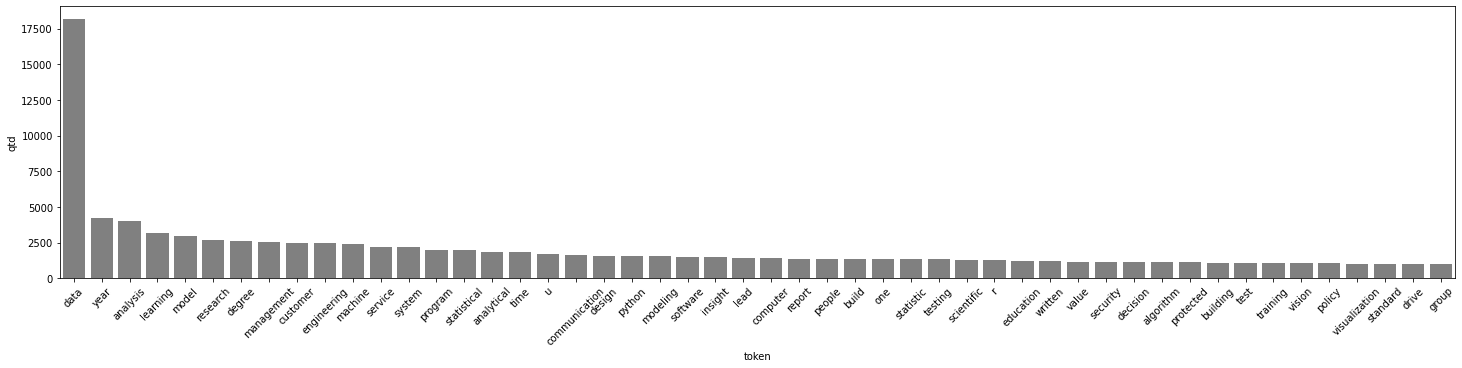

In [299]:
# Plot
plt.figure(figsize=(25, 5))
fig = sns.barplot(data=df_freq.head(50), x='token', y='qtd', color='gray')
fig.tick_params(axis='x', rotation=45)

##### Frequency

The frequency returned relevant words, like `data`, `machine` and `degree`. Althouth certainly there are cases like `python` or `r` in which just one word is enough, there are some words that are expected to be linked to other, like `deep learning` or `data visualization`.  

In [118]:
# Comparing different languages.
list_lang = ['python', 'sql', 'r', 'java', 'c', 'go', 'julia', 'scala', 'javascript', 'swift', 'matlab', 'sas']
# obs: languages obtained from https://www.datacamp.com/blog/top-programming-languages-for-data-scientists-in-2022

df_lang = df_freq.loc[df_freq['token'].isin(list_lang)]
df_lang['perc'] = (df_lang['qtd'] / df_lang['qtd'].sum() * 100).astype(int)

df_lang

C:\Users\Kenji\AppData\Local\Temp\ipykernel_2968\2258299198.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lang['perc'] = (df_lang['qtd'] / df_lang['qtd'].sum() * 100).astype(int)


,token,qtd,perc
103,python,1540,32
104,r,1261,26
101,sql,964,20
395,java,261,5
610,c,180,3
396,scala,175,3
1394,go,138,2
1769,matlab,113,2
605,julia,51,1
607,javascript,47,0


In [320]:
# Checking the frequency of python, r and sql in job descriptions.
df_clean['python'] = 0
df_clean['r'] = 0
df_clean['sql'] = 0

for index, row in df_clean.iterrows():
    if 'python' in row['tokens']:
        df_clean.loc[index, 'python'] = 1
    
    if 'r' in row['tokens']:
        df_clean.loc[index, 'r'] = 1
    
    if 'sql' in row['tokens']:
        df_clean.loc[index, 'sql'] = 1


print(f'''Frequency:
- python: {df_clean['python'].sum() / df_clean.shape[0]}
- r: {df_clean['r'].sum() / df_clean.shape[0]}
- sql: {df_clean['sql'].sum() / df_clean.shape[0]}
- None: {df_clean.loc[(df_clean['python'] == 0) & (df_clean['r'] == 0) & (df_clean['sql'] == 0)].shape[0] / df_clean.shape[0]}
''')

Frequency:
- python: 0.5380993150684932
- r: 0.4203767123287671
- sql: 0.3240582191780822
- None: 0.3386130136986301



##### Language

The majority of program language is definitely `python`, `R` and `sql`, being present in almost in 3 of 4 job postings.

### N-grams

In [120]:
bigrams = list(nltk.ngrams(tokens, 2))
bigrams = [frozenset(i) for i in bigrams]

trigrams = list(nltk.ngrams(tokens, 3))
trigrams = [frozenset(i) for i in trigrams]

# disclaimer: since all job descriptions are merged, there will be n-grams formed of two separate corpus (e.g. last token of first document and first token of second document).

In [321]:
# Organizing the bigram
df_bi = pd.DataFrame({'bigram': bigrams}).value_counts().to_frame().reset_index().rename(columns={0:'qtd'})

list_token1 = []
list_token2 = []
for i in df_bi['bigram']:
    try:
        token1, token2 = i
        list_token1.append(token1)
        list_token2.append(token2)
    except:
        token1 = i
        list_token1.append(token1)
        list_token2.append(token1)
        
df_bi['token1'] = list_token1
df_bi['token2'] = list_token2

In [322]:
df_bi.describe(percentiles=np.array(list(range(1, 10, 1)))/10).T.round(1)

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
qtd,210143.0,3.2,10.5,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,5.0,2232.0


In [324]:
df_bi.head(20)

,bigram,qtd,token1,token2
0,"(machine, learning)",2232,machine,learning
1,"(analysis, data)",1018,analysis,data
2,"(python, r)",738,python,r
3,"(bachelor, degree)",716,bachelor,degree
4,"(master, degree)",592,master,degree
5,"(visualization, data)",586,visualization,data
6,"(set, data)",515,set,data
7,"(deep, learning)",492,deep,learning
8,"(source, data)",470,source,data
9,"(verbal, written)",442,verbal,written


##### Bigram

The majority of the sample are unique bigrams (percentile 70), with the most frequent bigram appeared 209 times. This result can be perceived as a sign that we may be in the correct path; since our goal is to retrieve the most relevant bigrams, we reduces our burden in at least 70%.

The most relevant keywords are:

- machine learning
- data analysis
- python
- r
- bachelor's and/or master's degree
- data visualization
- deep learning
- statistical analysis
- data mining
- verbal and written communication skills

In [154]:
term = 'nlp'
tokens.count(term)

234

In [157]:
term = 'tensorflow'
tokens.count(term)

177

In [158]:
term = 'scikit'
tokens.count(term)

55

In [160]:
term = 'panda'
tokens.count(term)

202

In [163]:
term = 'pytorch'
tokens.count(term)

103

In [165]:
term = 'tableau'
tokens.count(term)

327

In [170]:
term = 'powerbi'
tokens.count(term)

47

In [173]:
term = 'mlops'
tokens.count(term)

57

In [174]:
term = 'governance'
tokens.count(term)

171

In [326]:
# Organizing the trigram
df_tri = pd.DataFrame({'bigram': trigrams}).value_counts().to_frame().reset_index().rename(columns={0:'qtd'})
df_tri.describe(percentiles=np.array(list(range(1, 10, 1)))/10).T.round(1)

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
qtd,283293.0,2.4,5.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,4.0,371.0


In [328]:
df_tri.head(30)

,bigram,qtd
0,"(communication, verbal, written)",371
1,"(machine, data, learning)",258
2,"(machine, model, learning)",232
3,"(python, sql, r)",189
4,"(oral, communication, written)",181
5,"(messy, underexplored, data)",168
6,"(insight, data-driven, producing)",162
7,"(hardware, software, manager)",158
8,"(hardware, innovative, software)",158
9,"(manager, software, placing)",158


##### Trigram

Similar results as bigrams.